<a href="https://colab.research.google.com/github/TranThiDieuHien/Cac-thuat-toan-toi-uu/blob/main/Bai_tap_Linear_Regression_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mô Tả Bài Toán

Bạn của bạn là một đại lý bán nhà và muốn bạn giúp họ dự đoán giá nhà.Họ mong muốn rằng bạn sẽ tạo ra một mô hình cho họ để cho phép họ có thể đưa vào một vài đặc điểm của một nhà và trả về ước tính giá trị của nhà đó sẽ được bán với giá là bao nhiêu.

### Dữ liệu chứa các cột sau: <br>


<li> crim </li>
<li> zn </li>
<li> indus </li>
<li> chas </li>
<li> nox </li>
<li> rm </li>
<li> age </li>
<li> dis </li>
<li> rad </li>
<li> tax </li>
<li> ptratio </li>
<li> b </li>
<li> lstat </li>
<li> medv </li>

### Khai báo thư viện

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Đọc file data.csv

In [ ]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
BostonHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
BostonHousing.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

## Training a Linear Regression Model

Bắt đầu đào tạo một mô hình hồi quy. Đầu tiên, ta sẽ chia dữ liệu Data thành một mảng X chứa các yếu tố cần training và một mảng y có chứa biến mục tiêu cần hướng tới. Trong trường hợp này là cột medv.


In [ ]:
X = BostonHousing[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
y = BostonHousing['medv']

#### Chia dữ liệu thành tập train và tập test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
33,1.15172,0.0,8.14,0,0.538,5.701,95.0,3.7872,4,307,21.0,358.77,18.35
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31


## Khởi tạo Model Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
predictions

array([37.56311787, 32.14445143, 27.06573629,  5.67080633, 35.09982577,
        5.85803701, 27.53708506, 31.81019188, 26.35634771, 22.77208748,
       31.91183048, 21.50224061, 23.70119983, 33.3622504 , 28.51633591,
       14.39456899,  0.19284025, 18.66247155, 13.71004139, 14.13408635,
        2.03263952, 19.7280831 , 38.18657429, 24.19760058, 31.30247973,
       11.14144544, 25.03636951, 23.27970871, 22.49420127, 20.52972594,
       15.16513744,  6.92553586, 18.3557733 , 22.37179804, 28.91287973,
       19.02980786, 30.19357214,  8.74384915, 40.86691522, 34.53763591,
       20.70224878,  2.59618963, 29.99590282, 12.15704798, 27.10186397,
       30.8052437 , -6.24169079, 19.84885777, 20.92973441, 12.43523958,
       20.4949947 , 19.19231742, 23.69073157, 12.67998473, 17.14252424,
       25.04649176, 34.77758126, 15.23294903, 28.22306193, 21.08745388,
       20.39506129, 25.79476888, 14.72463673, 33.18635032, 23.17771307,
       13.11057248, 19.23154617, 24.61162961, 21.50327036, 22.00

### Kiểm tra độ chính xác của mô hình dự đoán so với thực tế

In [ ]:
lm.score(X_test,y_test)

0.7334492147453091

Ta có thể thấy rằng độ chính xác của mô hình trên là 73,35%. Mô hình có độ chính xác khá cao.

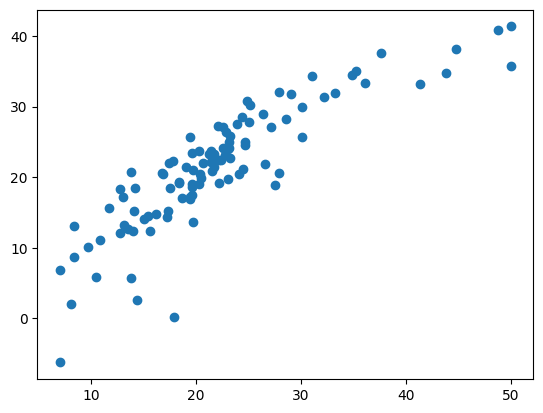

In [ ]:
plt.scatter(y_test,predictions)

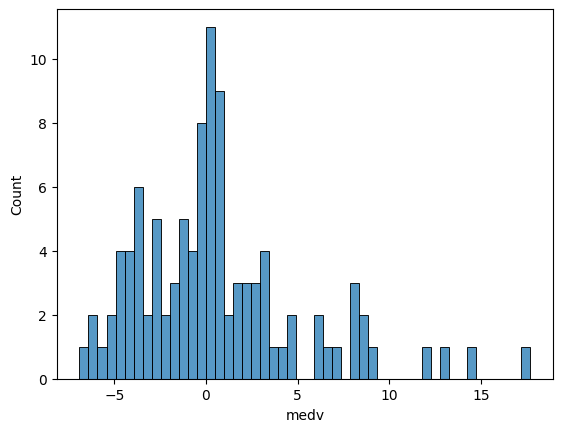

In [ ]:
sns.histplot((y_test-predictions),bins=50);

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.2132704958423735
MSE: 20.869292183770686
RMSE: 4.568292042303193
